# Data Science for Churn and Bank Customers

## Churn for bank customers 

- A questão do projeto é tentar prever o possível "churn" do cliente de um banco, ou seja, prever se o cliente irá ou não sair daquele banco

* Podemos ver o dataset e o problema [aqui](https://www.kaggle.com/mathchi/churn-for-bank-customers).

### Descrição da base de dados

- RowNumber: Corresponde apenas a contagem das linhas, e não tem efeito para a previsão.
- CustomerId: Valores aleatórios para identificação do cliente.
- Surname: Sobrenome do cliente. 
- CreditScore: Score de crédito, base de cálculo sobre pagamentos e dividas que o cliente pode ter, quanto maior o score, menos provavel dele sair do banco.
- Geography: Localização do cliente.
- Gender: Gênero.
- Age: Idade. Aparentemente clientes mais velhos tem menos probabilidade de sair do banco.
- Tenure: Quantidade de anos que o cliente é parte daquele banco. Geralmente clientes mais antigos tem menos probabilidade de abandonar o banco.
- Balance: Saldo no banco. Geralmente clientes com um saldo maior no banco tem menos probabilidade de abandona-lo. 
- NumOfProducts: refere-se ao número de produtos que um cliente comprou por meio do banco.
- HasCrCard: Variável dummy que demonstra se o cliente tem ou não um cartão de crédito. (1 - sim/0 - não)
- IsActiveMember: É um membro ativo ou não do banco (1 - sim/0 - não). Membros ativos geralmente tem menos probabilidade de abandonar o banco. 
- EstimatedSalary: Salário estimado. As pessoas com salários mais baixos têm maior probabilidade de sair do banco do que aquelas com salários mais altos.
- Exited: Se o cliente saiu ou não daquele banco. (1- sim/0-não)

In [1]:
#importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importando a base de dados
df_churn = pd.read_csv("churn.csv")

In [3]:
df_churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Tratando os dados

In [4]:
#retirando a coluna RowNumber por não agregar valor as variáveis 
df_churn.drop('RowNumber',axis=1,inplace=True)

In [5]:
df_churn.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
#verificando se há valores nulos 
df_churn.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
#Deixando as colunas com um padrão melhor
df_churn.rename(columns={'CustomerId':'customer_id','Surname':'sobrenome','CreditScore':'credit_score','Geography':'country','Gender':'genero','Age':'idade','Tenure':'tempo_medio','Balance':'saldo','NumOfProducts':'produtos_contratados','HasCrCard':'cartao_credito','IsActiveMember':'membro_ativo','EstimatedSalary':'salario_estimado','Exited':'churn'},inplace=True)

In [8]:
df_churn.head()

,customer_id,sobrenome,credit_score,country,genero,idade,tempo_medio,saldo,produtos_contratados,cartao_credito,membro_ativo,salario_estimado,churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Análise exploratória 

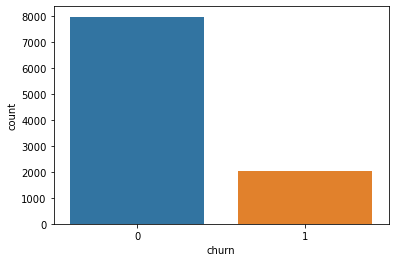

In [9]:
#verificando a quantidade de clientes que saíram
sns.countplot(df_churn['churn']);

- Há mais valores para os clientes que ainda estão no banco (Churn=0) do que os que já saíram (Churn=1)

In [11]:
#Verificando a quantidade exata da coluna Churn
df_churn['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

- em 10.000 observações, temos aproximadamente 20% de clientes "churn" e aproximadamente 80% clientes do banco

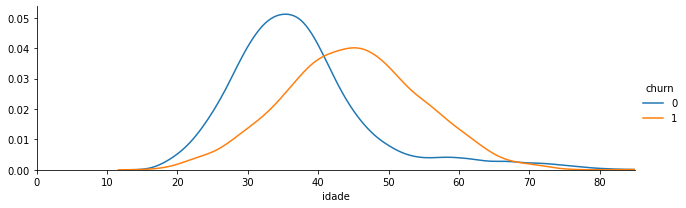

In [12]:
#Analisando pela idade das amostras
idade = sns.FacetGrid(df_churn, hue='churn', aspect=3)
idade.map(sns.kdeplot,'idade').add_legend()
idade.set(xlim=(0,85))

- Vemos que os clientes que estão no banco estão mais concentrados na faixa etária de 30 a 40 anos, enquanto os que já saíram se concentram na faixa etária de 40 a 50 anos. 

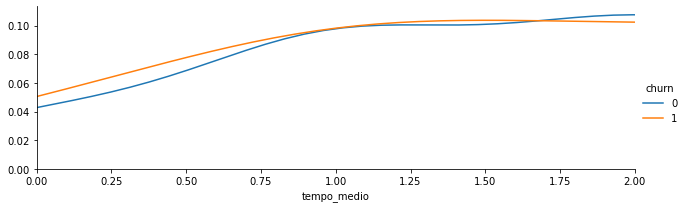

In [13]:
#Analisando pelo tempo médio das amostras
saldo = sns.FacetGrid(df_churn, hue='churn', aspect=3)
saldo.map(sns.kdeplot,'tempo_medio').add_legend()
saldo.set(xlim=(0,2))

- É possível observar também que o tempo médio não possui tanta influência no churn

<AxesSubplot:>

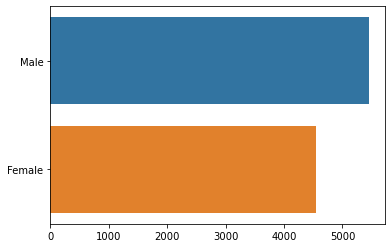

In [14]:
#Analisando por gênero
genero = df_churn['genero'].value_counts()
sns.barplot(y=genero.index,x=genero.values)

- Temos 4.500 observações com o gênero feminino e 5.500 observações do genero masculino

<AxesSubplot:xlabel='churn', ylabel='genero'>

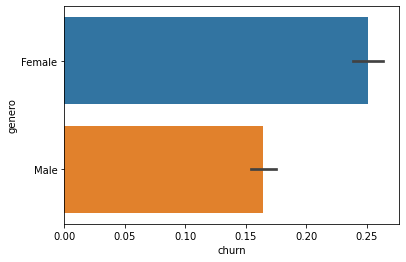

In [15]:
sns.barplot(data=df_churn,y='genero',x='churn',orient='h')

- E o gênero feminino fez mais churn do que o genero masculino

In [16]:
df_churn[['genero','churn']].value_counts()

genero  churn
Male    0        4559
Female  0        3404
        1        1139
Male    1         898
dtype: int64

- Dos clientes que **não deram churn**, 57% são do gênero masculino e 43% do gênero feminino
- Já dos clientes que deram churn, 56% são do gênero feminino, e 44% do genêro masculino

<AxesSubplot:>

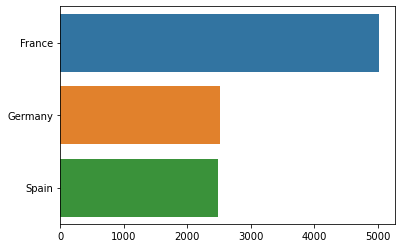

In [17]:
# Analisando por país
country = df_churn['country'].value_counts()
sns.barplot(y=country.index,x=country.values)

In [18]:
country

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

- Temos aproximadamente 50% de observações da França, 25% do Alemanha e 25% da Espanha

<AxesSubplot:xlabel='cartao_credito', ylabel='count'>

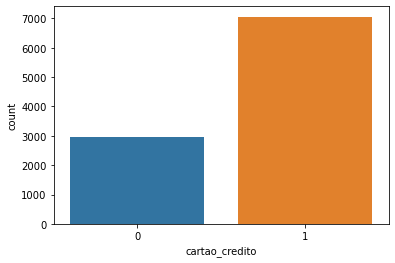

In [21]:
sns.countplot(df_churn['cartao_credito'])

In [22]:
#Analisando se cartão de crédito é uma variável que impulsiona o churn
df_churn[['cartao_credito','churn']].value_counts()

cartao_credito  churn
1               0        5631
0               0        2332
1               1        1424
0               1         613
dtype: int64

- Do total de usuários, aproximadamente 70% possuí cartão de crédito. Destes, 20% realizou churn. Portanto, podemos afirmar que possuir cartão de crédito é mais comum entre a base de clientes, e esse não é um motivo tão relevante para realizar churn

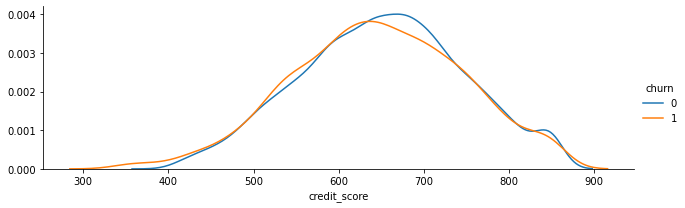

In [23]:
#Analisando pelo score credit das amostras
saldo = sns.FacetGrid(df_churn, hue='churn', aspect=3)
saldo.map(sns.kdeplot,'credit_score').add_legend()

- Também podemos assumir que ter um score de crédito alto ou baixo não influência tanto no churn

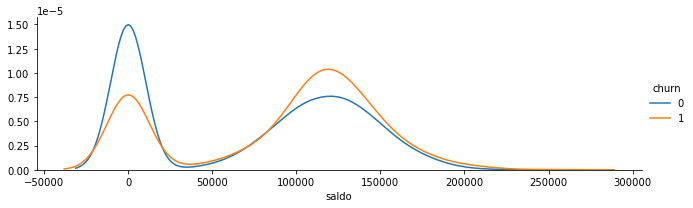

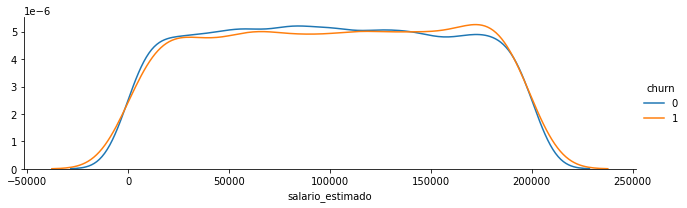

In [24]:
#Analisando pelo saldo e salário estimado das amostras
saldo = sns.FacetGrid(df_churn, hue='churn', aspect=3)
saldo.map(sns.kdeplot,'saldo').add_legend()

saldo = sns.FacetGrid(df_churn, hue='churn', aspect=3)
saldo.map(sns.kdeplot,'salario_estimado').add_legend()

- Vemos que um saldo em conta em torno de 100.000 a 150.000 pode influenciar um pouco no churn, porém, o salário estimado não possui tanta influência. 

<AxesSubplot:>

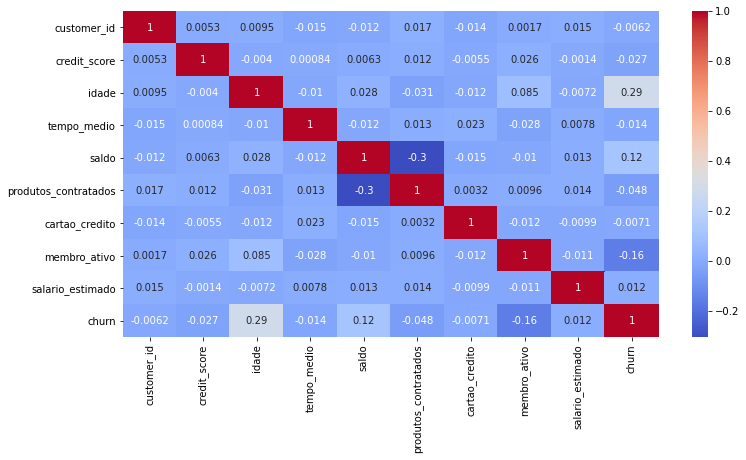

In [25]:
# Analisando a correlação entre as variáveis
plt.figure(figsize=(12,6))
sns.heatmap(df_churn.corr(),annot=True,cmap='coolwarm')

- Não é possível observar uma correlação muito alta entre as variáveis, vemos que é um pouco mais relevante apenas a relação entre idade X churn e saldo X produtos_contratados.

## Utilizando o modelo de Regressão Logistica

### Tratando as variáveis qualitativas

In [53]:
#transformando todas as colunas de uma vez: 

for coluna in df_churn:
    if df_churn[coluna].dtype == object:
        df_churn[coluna] = df_churn[coluna].astype('category').cat.codes

In [54]:
df_churn.head()

### retirar o sobrenome

,customer_id,sobrenome,credit_score,country,genero,idade,tempo_medio,saldo,produtos_contratados,cartao_credito,membro_ativo,salario_estimado,churn
0,15634602,1115,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,1177,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,2040,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,289,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,1822,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [75]:
### Separando X e Y: 

y = df_churn['churn']
x = df_churn['idade'].values.reshape(-1,1)

In [105]:
### criando um modelo
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [106]:
logreg = LogisticRegression()

In [128]:
from sklearn.model_selection import train_test_split

In [130]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

# Fitando os dados

logreg.fit(x_train,y_train)

LogisticRegression()

In [131]:
## criando a variavel preditora

y_pred = logreg.predict_proba(x_test)[:, 1]

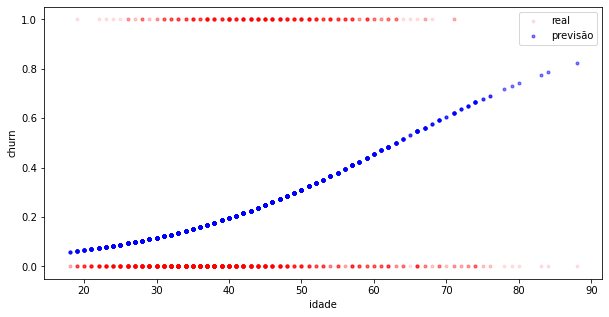

In [132]:
## Plotando os dados

plt.figure(figsize=(10,5))

plt.plot(x_test, y_test, '.',label='real', c='red',alpha = 0.1)
plt.plot(x_test,y_pred,'.',label='previsão',c='blue',alpha=0.5)

plt.xlabel('idade')
plt.ylabel('churn')

plt.legend()
plt.show()

In [133]:
logreg.predict_proba(x_test)

array([[0.89016448, 0.10983552],
       [0.93381768, 0.06618232],
       [0.86365701, 0.13634299],
       ...,
       [0.67636378, 0.32363622],
       [0.91686143, 0.08313857],
       [0.79464602, 0.20535398]])

In [114]:
print(logreg.coef_)

[[0.06294447]]


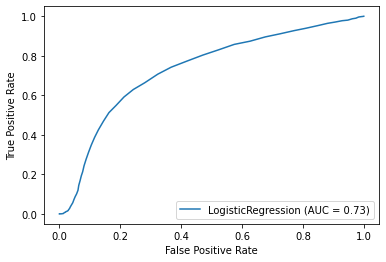

In [115]:
plot_roc_curve(logreg, x, y)

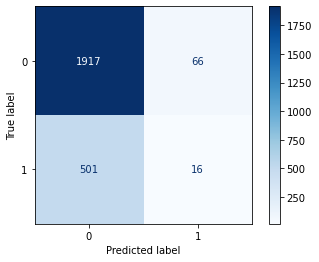

In [134]:
## matriz de confusao

plot_confusion_matrix(logreg,x_test,y_test,cmap='Blues')

- Temos 7677 observações como **verdadeiros positivos** (quando a previsão foi correta)
- 73 observações como **falso verdadeiro** (quando a classe que não estamos buscando, ou seja, não fez churn, foi prevista corretamente
- 286 observações como falso positivo (observações que estamos buscando e foram previstas incorretamente)
- 1964 observações como falso negativo (a classe que não estamos buscando - não fez churn - foi prevista incorretamente)

-- Como o verdadeiro positivo deu o maior nº de observações, acredito que o modelo esteja bom !

## Utilizando o modelo de Arvore de Decisão

In [118]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [119]:
modelo_AD = DecisionTreeClassifier()
modelo_AD.fit(x_train,y_train)
y_pred = modelo_AD.predict(x_test)

<Figure size 1440x720 with 0 Axes>

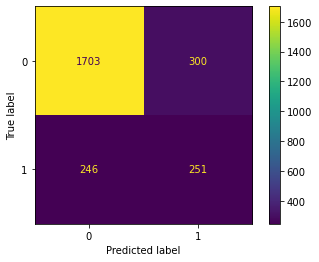

In [120]:
plt.figure(figsize=(20,10))
plot_confusion_matrix(modelo_AD,x_test,y_test)
plt.show()

- Temos 1704 observações como **verdadeiros positivos** (quando a previsão foi correta)
- 257 observações como **falso verdadeiro** (quando a classe que não estamos buscando, ou seja, não fez churn, foi prevista corretamente
- 299 observações como falso positivo (observações que estamos buscando e foram previstas incorretamente)
- 240 observações como falso negativo (a classe que não estamos buscando - não fez churn - foi prevista incorretamente)

-- Como o verdadeiro positivo deu o maior nº de observações, acredito que o modelo esteja bom !

In [121]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      2003
           1       0.46      0.51      0.48       497

    accuracy                           0.78      2500
   macro avg       0.66      0.68      0.67      2500
weighted avg       0.79      0.78      0.79      2500



- Temos uma boa precisão para a classificação 0, nem tão boa assim para a classificação 1 e uma acurácia de apenas 78%. 

In [125]:
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

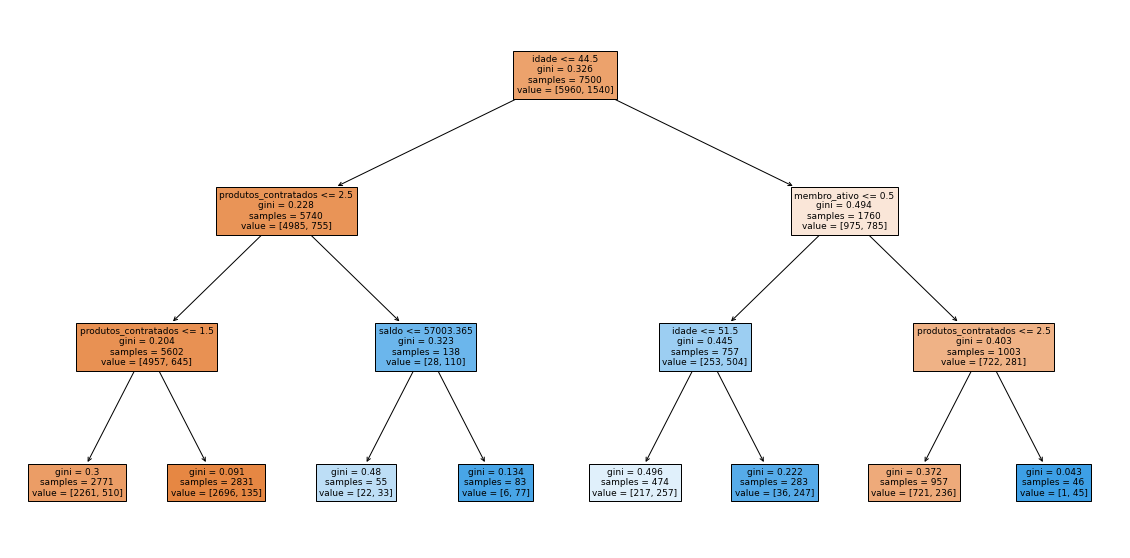

In [138]:
plt.figure(figsize=(20,10))
plot_tree(tree,filled=True,feature_names=df_churn.drop('churn',axis=1).columns)
plt.show()

### Utilizando o Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
modelo_rf = RandomForestClassifier(n_estimators=100,random_state=42)
modelo_rf.fit(x_train,y_train)
y_pred_rf = modelo_rf.predict(x_test)

In [48]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2003
           1       0.80      0.45      0.57       497

    accuracy                           0.87      2500
   macro avg       0.84      0.71      0.75      2500
weighted avg       0.86      0.87      0.85      2500



- No caso do random forest a acurácia melhorou, subindo para 87%
- Assim como a precisão que melhorou muito, nas duas classificações

### Utilizando o AdaBoost

In [49]:
from sklearn.ensemble import AdaBoostClassifier

In [50]:
modelo_ab = AdaBoostClassifier(modelo_AD,n_estimators=50,random_state=42)
modelo_ab.fit(x_train,y_train)
y_pred_ab = modelo_ab.predict(x_test)

In [51]:
print(classification_report(y_test,y_pred_ab))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      2003
           1       0.47      0.53      0.50       497

    accuracy                           0.79      2500
   macro avg       0.67      0.69      0.68      2500
weighted avg       0.80      0.79      0.79      2500



- Já nesse caso a acurácia foi melhor que o modelo de arvore de decisão, porém, pior que o Random Forest
- A precisão na classificação 0 continuou boa, mas a classificação 1 continuou ruim 

In [52]:
x.columns[modelo_ab.feature_importances_.argmax()]

'idade'

- O feature mais importante do modelo é a **idade**